<a href="https://colab.research.google.com/github/pwy7fv/DS-4002-Group-Projects/blob/main/FF4_Vader__Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#getting files from github repo
!git clone https://github.com/pwy7fv/DS-4002-Group-Projects

Cloning into 'DS-4002-Group-Projects'...
remote: Enumerating objects: 611, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 611 (delta 57), reused 24 (delta 24), pack-reused 524 (from 1)
Receiving objects: 100% (611/611), 11.09 MiB | 10.35 MiB/s, done.
Resolving deltas: 100% (336/336), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [25]:
#creating dataframe of FF4_vader_2009 data to analyze
df4_vader09 = pd.read_csv('/content/DS-4002-Group-Projects/DATA/Cleaned Data/FF4_Vader2009.csv', low_memory=False)
df4_vader09.head()

,Rating,Title,Content,Author Name,Date,Year,Sentiment Overall,Negative Score,Neutral Score,Positive Score,Overall Percentage Score
0,7.0,"Still fast, still furious","Fast and Furious, or 4 Fast 4 Furious if you'r...",C-Younkin,2009-03-30,2009,Positive,0.061,0.770,0.170,0.9974
1,4.0,First Five Minutes. Over,"Definitely, good for car-fans. Since I'm not o...",Mihnea_aka_Pitbull,2009-04-01,2009,Negative,0.137,0.817,0.046,-0.9504
2,4.0,In automatic transmission,Exhausted and pretty much running on synthetic...,Jay_Exiomo,2009-04-01,2009,Positive,0.097,0.791,0.112,0.5426
3,10.0,"Great action, Nice cars and plenty of sexy bab...",I built this movie of 6 reels last night and s...,5klogiudice,2009-04-01,2009,Positive,0.042,0.706,0.253,0.9901
4,8.0,Is this one the best one yet?,This was a good movie. They were able to bring...,blake-brown20,2009-04-02,2009,Positive,0.050,0.744,0.206,0.9950


In [26]:
#realized above that the newly added vader column "Sentiment Overall"
#is arranged and named differently than from how that column is in FF3 movies, so gonna clean it below

# Rearrange columns to make 'Sentiment Overall' the last column
columns_order = [
    'Rating', 'Title', 'Content', 'Author Name', 'Date', 'Year',
    'Negative Score', 'Neutral Score', 'Positive Score', 'Overall Percentage Score', 'Sentiment Overall'
]

# Rearrange the dataframe to match the new column order
df4_vader09 = df4_vader09[columns_order]

# Rename the 'Sentiment Overall' column to 'Overall Sentiment'
df4_vader09 = df4_vader09.rename(columns={'Sentiment Overall': 'Overall Sentiment'})

# Show the updated dataframe
df4_vader09.head()

,Rating,Title,Content,Author Name,Date,Year,Negative Score,Neutral Score,Positive Score,Overall Percentage Score,Overall Sentiment
0,7.0,"Still fast, still furious","Fast and Furious, or 4 Fast 4 Furious if you'r...",C-Younkin,2009-03-30,2009,0.061,0.770,0.170,0.9974,Positive
1,4.0,First Five Minutes. Over,"Definitely, good for car-fans. Since I'm not o...",Mihnea_aka_Pitbull,2009-04-01,2009,0.137,0.817,0.046,-0.9504,Negative
2,4.0,In automatic transmission,Exhausted and pretty much running on synthetic...,Jay_Exiomo,2009-04-01,2009,0.097,0.791,0.112,0.5426,Positive
3,10.0,"Great action, Nice cars and plenty of sexy bab...",I built this movie of 6 reels last night and s...,5klogiudice,2009-04-01,2009,0.042,0.706,0.253,0.9901,Positive
4,8.0,Is this one the best one yet?,This was a good movie. They were able to bring...,blake-brown20,2009-04-02,2009,0.050,0.744,0.206,0.9950,Positive


In [28]:
#creating dataframe of FF3_vader_dec data to analyze(2016 - 2025)
df4_vader_dec = pd.read_csv('/content/DS-4002-Group-Projects/DATA/Cleaned Data/FF4_Vader_dec.csv', low_memory=False)
df4_vader_dec.head()


,Rating,Title,Content,Author Name,Date,Year,Sentiment Overall,Negative Score,Neutral Score,Positive Score,Overall Percentage Score
0,3.0,The first one BORING!,"Even the atrocious Tokyo Drift wasn't boring, ...",educallejero,2019-03-24,2019,Negative,0.191,0.725,0.084,-0.9825
1,4.0,Best in the series so far,I found that the fourth part was more mature t...,lythis-love,2019-04-18,2019,Positive,0.109,0.736,0.154,0.7779
2,7.0,Brilliant film.,It's say Brian is back working for the FBI and...,wesgunton,2019-04-22,2019,Negative,0.117,0.883,0.000,-0.7351
3,1.0,Annoying camera shake...,"Every time there is a fight scene, car chase o...",phil-932-237806,2019-05-10,2019,Negative,0.138,0.862,0.000,-0.6908
4,7.0,feels like we're back home,"Beastly movie. Awesome action, great racing sc...",FeastMode,2019-06-24,2019,Positive,0.037,0.674,0.289,0.9862


In [35]:
print(df4_vader_dec.dtypes)

Rating                      float64
Title                        object
Content                      object
Author Name                  object
Date                         object
Year                          int64
Negative Score              float64
Neutral Score               float64
Positive Score              float64
Overall Percentage Score    float64
Overall Sentiment            object
dtype: object


In [32]:
df4_vader09.to_csv('/content/DS-4002-Group-Projects/DATA/FF4_Vader2009.csv', index = False) #make csv file and put it in repo

In [29]:
#realized above that the newly added vader column "Sentiment Overall"
#is arranged and named differently than from how that column is in FF3 movies, so gonna clean it below

# Rearrange columns to make 'Sentiment Overall' the last column
columns_order = [
    'Rating', 'Title', 'Content', 'Author Name', 'Date', 'Year',
    'Negative Score', 'Neutral Score', 'Positive Score', 'Overall Percentage Score', 'Sentiment Overall'
]

# Rearrange the dataframe to match the new column order
df4_vader_dec = df4_vader_dec[columns_order]

# Rename the 'Sentiment Overall' column to 'Overall Sentiment'
df4_vader_dec = df4_vader_dec.rename(columns={'Sentiment Overall': 'Overall Sentiment'})

# Show the updated dataframe
df4_vader_dec.head()

,Rating,Title,Content,Author Name,Date,Year,Negative Score,Neutral Score,Positive Score,Overall Percentage Score,Overall Sentiment
0,3.0,The first one BORING!,"Even the atrocious Tokyo Drift wasn't boring, ...",educallejero,2019-03-24,2019,0.191,0.725,0.084,-0.9825,Negative
1,4.0,Best in the series so far,I found that the fourth part was more mature t...,lythis-love,2019-04-18,2019,0.109,0.736,0.154,0.7779,Positive
2,7.0,Brilliant film.,It's say Brian is back working for the FBI and...,wesgunton,2019-04-22,2019,0.117,0.883,0.000,-0.7351,Negative
3,1.0,Annoying camera shake...,"Every time there is a fight scene, car chase o...",phil-932-237806,2019-05-10,2019,0.138,0.862,0.000,-0.6908,Negative
4,7.0,feels like we're back home,"Beastly movie. Awesome action, great racing sc...",FeastMode,2019-06-24,2019,0.037,0.674,0.289,0.9862,Positive


In [31]:
df4_vader_dec.to_csv('/content/DS-4002-Group-Projects/DATA/FF4_Vader_dec.csv', index = False) #make csv file and put it in repo


In [5]:
# Group by the 'Year' column and calculate the mean of 'Overall Percentage Score'
avg_sentiment_09 = df4_vader09['Overall Percentage Score'].mean()
avg_sentiment_dec = df4_vader_dec['Overall Percentage Score'].mean()

print(f"Average sentiment score for 2009: {avg_sentiment_09}")
print(f"Average sentiment score for 2019 - 2025: {avg_sentiment_dec}")

Average sentiment score for 2009: 0.5827878787878786
Average sentiment score for 2019 - 2025: 0.3236228070175439


**Visualizations of Vader Analysis for FF4 2009 and FF4 2019 - 2025**



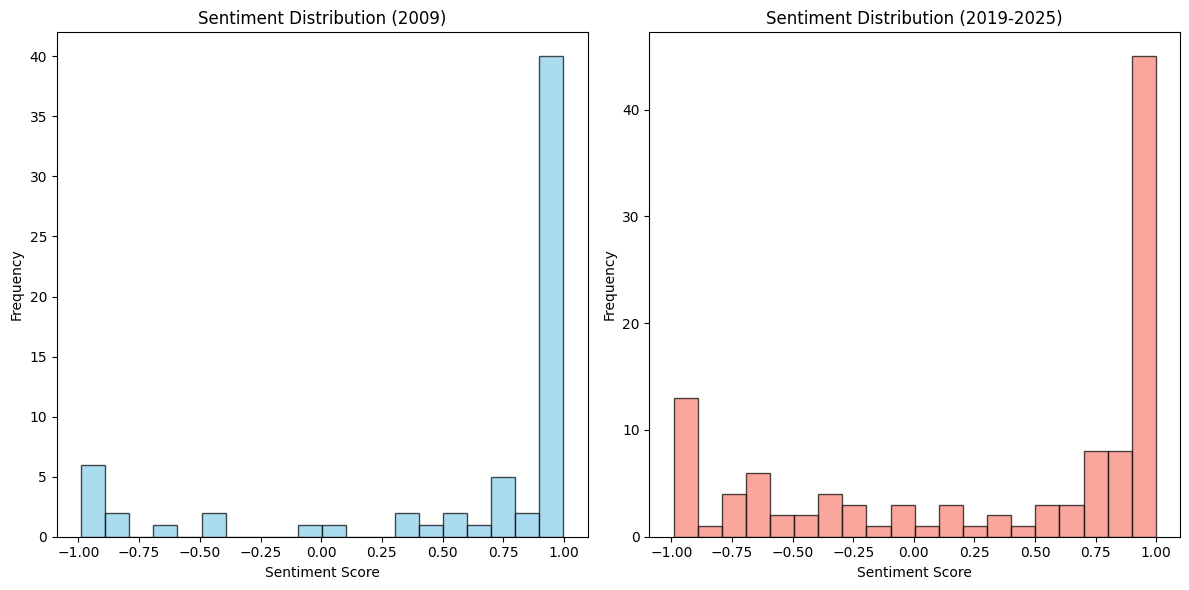

In [6]:
import matplotlib.pyplot as plt

# Plotting histograms for both periods
plt.figure(figsize=(12, 6))

# Histogram for 2006
plt.subplot(1, 2, 1)
plt.hist(df4_vader09['Overall Percentage Score'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Sentiment Distribution (2009)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Histogram for 2019-2025
plt.subplot(1, 2, 2)
plt.hist(df4_vader_dec['Overall Percentage Score'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Sentiment Distribution (2019-2025)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

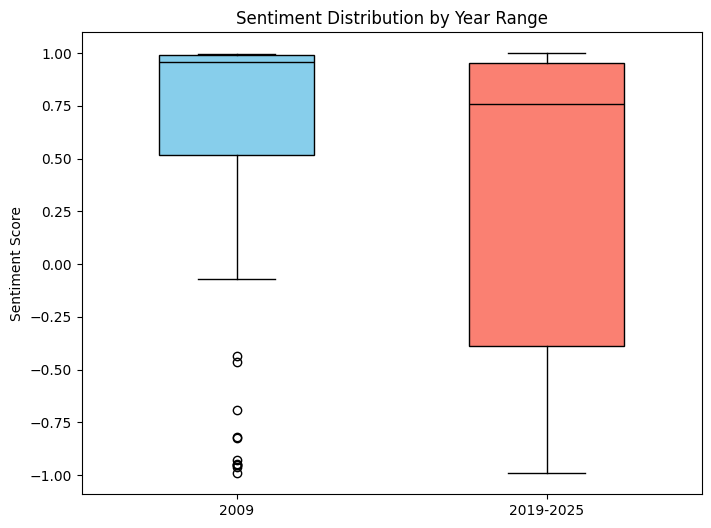

In [7]:
# Plotting box plots for both periods
plt.figure(figsize=(8, 6))

# Box plot for 2009
plt.boxplot(df4_vader09['Overall Percentage Score'], positions=[1], widths=0.5, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'), medianprops=dict(color='black'))

# Box plot for 2019-2025
plt.boxplot(df4_vader_dec['Overall Percentage Score'], positions=[2], widths=0.5, patch_artist=True,
            boxprops=dict(facecolor='salmon', color='black'), medianprops=dict(color='black'))

plt.xticks([1, 2], ['2009', '2019-2025'])
plt.title('Sentiment Distribution by Year Range')
plt.ylabel('Sentiment Score')

plt.show()

<ipython-input-19-7b053d7d380d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Count', data=sentiment_counts_09_df, palette='Set2')


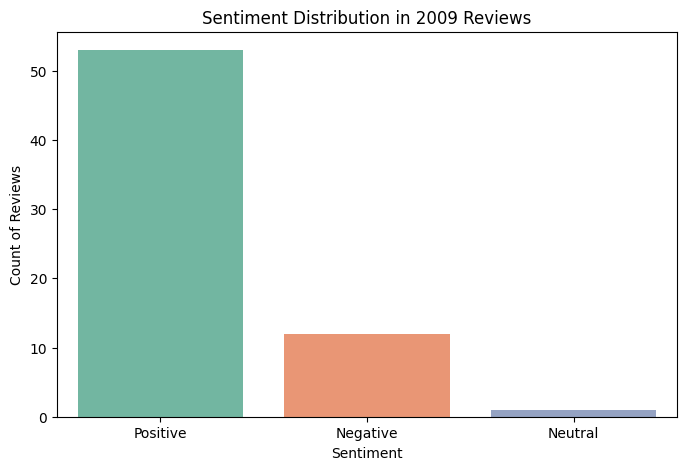

<ipython-input-19-7b053d7d380d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Count', data=sentiment_counts_dec_df, palette='Set2')


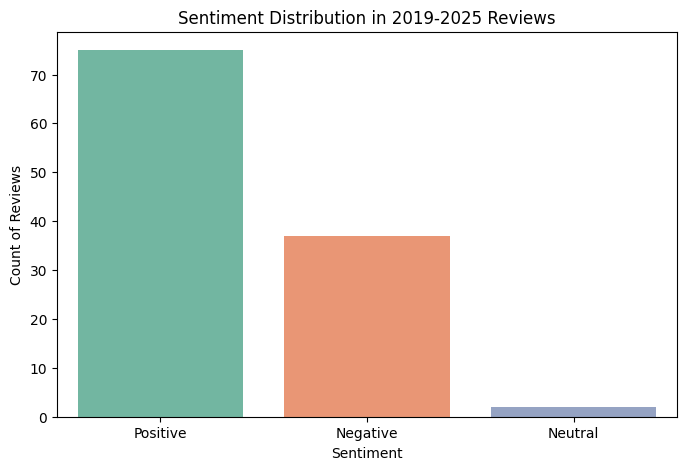

In [19]:
# Count the number of positive, negative, and neutral reviews for both periods
sentiment_counts_09 = df4_vader09['Overall Sentiment'].value_counts()
sentiment_counts_dec = df4_vader_dec['Overall Sentiment'].value_counts()

# Convert the counts to dataframes for easy plotting
sentiment_counts_09_df = sentiment_counts_09.reset_index()
sentiment_counts_09_df.columns = ['Sentiment', 'Count']
sentiment_counts_09_df['Period'] = '2009'

sentiment_counts_dec_df = sentiment_counts_dec.reset_index()
sentiment_counts_dec_df.columns = ['Sentiment', 'Count']
sentiment_counts_dec_df['Period'] = '2019-2025'

# Plot for 2009 reviews
plt.figure(figsize=(8, 5))
sns.barplot(x='Sentiment', y='Count', data=sentiment_counts_09_df, palette='Set2')
plt.title('Sentiment Distribution in 2009 Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count of Reviews')
plt.show()

# Plot for 2019-2025 reviews
plt.figure(figsize=(8, 5))
sns.barplot(x='Sentiment', y='Count', data=sentiment_counts_dec_df, palette='Set2')
plt.title('Sentiment Distribution in 2019-2025 Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count of Reviews')
plt.show()


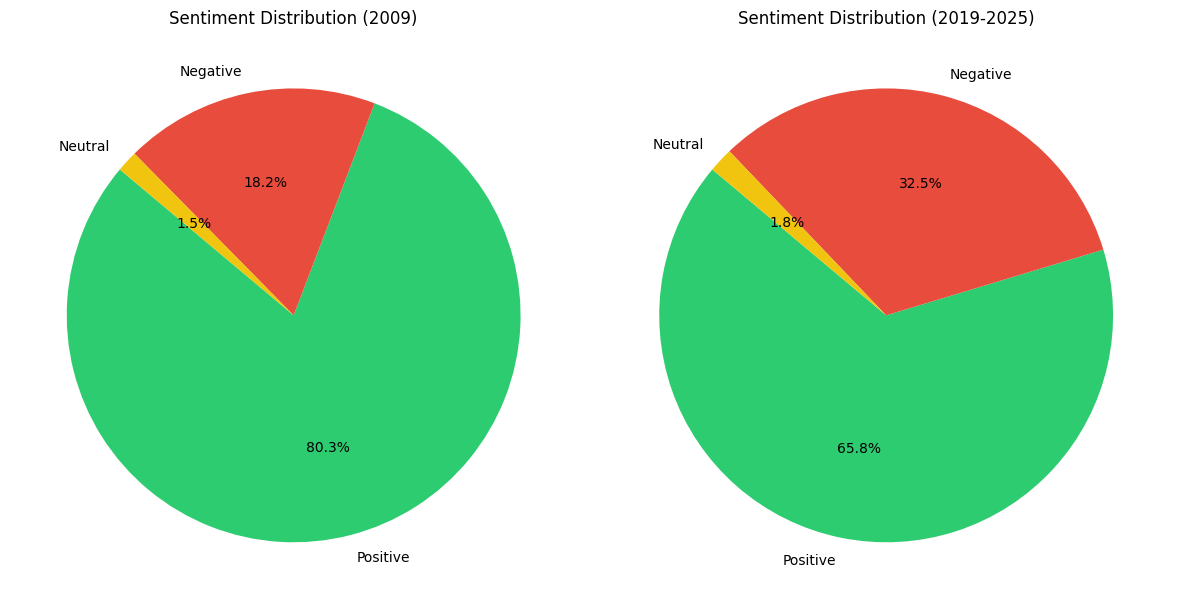

In [20]:
# Count sentiment occurrences for each dataset (using the 'Overall Sentiment' column)
sentiment_09 = df4_vader09["Overall Sentiment"].value_counts(normalize=True) * 100  # Convert to percentage
sentiment_dec = df4_vader_dec["Overall Sentiment"].value_counts(normalize=True) * 100  # Convert to percentage

# Pie chart labels and colors
labels = ["Positive", "Neutral", "Negative"]
colors = ["#2ecc71", "#e74c3c", "#f1c40f"]  # Green, Red, Yellow

# Create subplots for side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for 2009 dataset
axes[0].pie(sentiment_09, labels=sentiment_09.index, autopct='%1.1f%%', colors=colors, startangle=140)
axes[0].set_title("Sentiment Distribution (2009)")

# Pie chart for 2019-2025 dataset
axes[1].pie(sentiment_dec, labels=sentiment_dec.index, autopct='%1.1f%%', colors=colors, startangle=140)
axes[1].set_title("Sentiment Distribution (2019-2025)")

# Show the pie charts
plt.tight_layout()
plt.show()

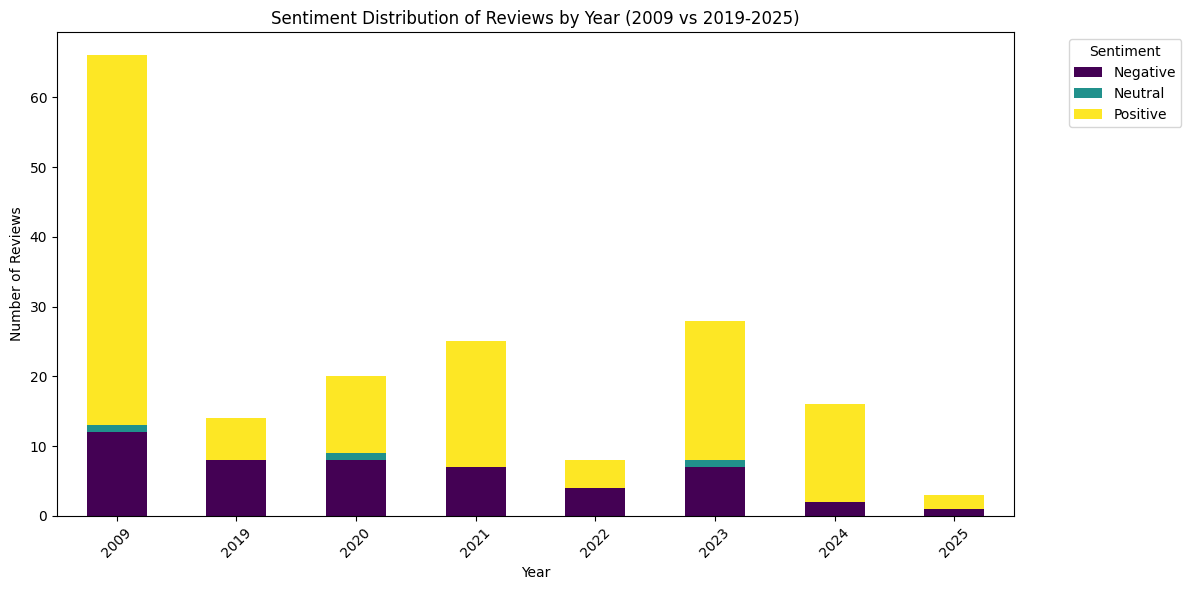

In [21]:

# Concatenate both datasets into a single DataFrame
df4_combined = pd.concat([df4_vader09, df4_vader_dec], ignore_index=True)

# 2. Group by Year, Sentiment Overall, and Period
sentiment_counts_combined = df4_combined.groupby(["Year", "Overall Sentiment"]).size().reset_index(name="Count")

# 3. Pivot the data to get Sentiment as columns
sentiment_pivot_combined = sentiment_counts_combined.pivot_table(index=["Year"],
                                                                columns="Overall Sentiment",
                                                                values="Count",
                                                                aggfunc="sum",
                                                                fill_value=0).reset_index()

# 4. Plotting
plt.figure(figsize=(12, 6))

# Create a bar plot with 'Year' on the x-axis, and sentiment counts on the y-axis
sentiment_pivot_combined.plot(kind="bar", x="Year", stacked=True, colormap="viridis", figsize=(12, 6), ax=plt.gca())

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Distribution of Reviews by Year (2009 vs 2019-2025)")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()
